In [0]:
import os
os.chdir('/content/drive/My Drive/google_project/interview_data')
!ls

 annotations			     model_helmet.h5
 annotations.xml		     model_helmet.json
 darknet			     model_mask.h5
 dataset.csv			     model_mask.json
 final				     MyFile.txt
 interview_data			     YOLO.ipynb
'Mask&Helmet_moels_training.ipynb'   Yoo_Data_Generation.ipynb


In [0]:
! git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13514 (delta 2), reused 0 (delta 0), pack-reused 13508
Receiving objects: 100% (13514/13514), 12.20 MiB | 6.51 MiB/s, done.
Resolving deltas: 100% (9233/9233), done.
Checking out files: 100% (2000/2000), done.


In [0]:
! ls

annotations	 dataset.csv	 MyFile.txt	  Yoo_Data_Generation.ipynb
annotations.xml  final		 Untitled0.ipynb
darknet		 interview_data  YOLO.ipynb


In [0]:
% cd darknet

/content/drive/My Drive/google_project/interview_data/darknet


In [0]:
! ls

3rdparty   chart_yolo-obj.png	   data			  obj
backup	   cmake		   image_yolov2.sh	  README.md
bad.list   CMakeLists.txt	   image_yolov3.sh	  results
build	   darknet		   include		  scripts
build.ps1  darknet53.conv.74	   json_mjpeg_streams.sh  src
build.sh   DarknetConfig.cmake.in  LICENSE		  video_v2.sh
cfg	   darknet.py		   Makefile		  video_yolov3.sh
chart.png  darknet_video.py	   net_cam_v3.sh	  yolo-obj.cfg


In [0]:
! wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-05-23 11:17:44--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   515KB/s    in 4m 46s  

2020-05-23 11:22:31 (555 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Converting all text file to unix format instead o doc is very important otherwise it can give error


In [0]:
!apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 1s (367 kB/s)
Selecting previously unselected package dos2unix.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../dos2unix_7.3.4-3_amd64.deb ...
Unpacking dos2unix (7.3.4-3) ...
Setting up dos2unix (7.3.4-3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
% cd data

/content/drive/My Drive/google_project/interview_data/darknet/data


In [0]:
! dos2unix test.txt
! dos2unix train.txt
! dos2unix obj.names
! dos2unix obj.data

dos2unix: converting file test.txt to Unix format...
dos2unix: converting file train.txt to Unix format...
dos2unix: converting file obj.names to Unix format...
dos2unix: converting file obj.data to Unix format...


In [0]:
% cd obj/images/

/content/drive/My Drive/google_project/interview_data/darknet/data/obj/images


In [0]:
!find . -type f -name "*.txt" -print0 | xargs -0 dos2unix

dos2unix: converting file ./92.txt to Unix format...
dos2unix: converting file ./143.txt to Unix format...
dos2unix: converting file ./158.txt to Unix format...
dos2unix: converting file ./176.txt to Unix format...
dos2unix: converting file ./111.txt to Unix format...
dos2unix: converting file ./40.txt to Unix format...
dos2unix: converting file ./9.txt to Unix format...
dos2unix: converting file ./56.txt to Unix format...
dos2unix: converting file ./144.txt to Unix format...
dos2unix: converting file ./25.txt to Unix format...
dos2unix: converting file ./127.txt to Unix format...
dos2unix: converting file ./94.txt to Unix format...
dos2unix: converting file ./159.txt to Unix format...
dos2unix: converting file ./177.txt to Unix format...
dos2unix: converting file ./10.txt to Unix format...
dos2unix: converting file ./41.txt to Unix format...
dos2unix: converting file ./112.txt to Unix format...
dos2unix: converting file ./26.txt to Unix format...
dos2unix: converting file ./145.txt to

# Setting up the Environment

In [0]:
!apt-get update > /dev/null
!apt-get upgrade > /dev/null
!apt-get install build-essential > /dev/null
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev > /dev/null
!apt-get install libopencv-dev > /dev/null

Extracting templates from packages: 100%
Extracting templates from packages: 100%


In [0]:
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile

!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused

In [0]:
!apt install g++-5
!apt install gcc-5
!apt update
!apt upgrade0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 7 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http

# Training the YOLO model
first check you must be in the darknet folder

In [0]:
!./darknet detector train data/obj.data yolo-obj.cfg darknet53.conv.74 -dont_show 

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolo-obj
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5

In [0]:
!./darknet detector train data/obj.data yolo-obj.cfg backup/yolo-obj_last.weights -dont_show 

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.859664, GIOU: 0.856482), Class: 0.998852, Obj: 0.842328, No Obj: 0.002288, .5R: 1.000000, .75R: 1.000000, count: 8, class_loss = 0.443755, iou_loss = 0.107460, total_loss = 0.551216 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.792293, GIOU: 0.787362), Class: 0.992233, Obj: 0.416612, No Obj: 0.000269, .5R: 1.000000, .75R: 0.666667, count: 6, class_loss = 0.838962, iou_loss = 0.351946, total_loss = 1.190909 

 1676: 0.348840, 0.349013 avg loss, 0.000100 rate, 2.138108 seconds, 107264 images, 0.397779 hours left
Loaded: 0.000033 seconds
Can't open label file. (This can be normal only if you use MSCOCO): data/obj/images/421.txt 
Can't open label file. (This can be normal only if you use MSCOCO): data/obj/images/392.txt 
Can't open label file. (This can be normal only if you use MSCOCO): data/obj/images/327.txt 
v3 (mse loss, Normalizer: (iou:

# Checking the YOLO model is it performing well or not

In [0]:
!./darknet detector test data/obj.data yolo-obj.cfg backup/yolo-obj_last.weights -ext_output -dont_show -out result_text.json < data/test.txt

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0

In [0]:
import cv2
prediction = cv2.imread('predictions.jpg')

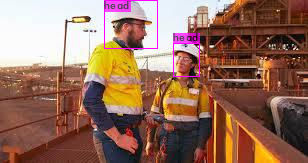

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(prediction)

# It seems that the YOLO model is performing well with around 1500 iterations
## We will use this model in final integration with our code